In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Récupération des données
reg=pd.read_csv("reg_simple.csv")
position=pd.read_csv("Position_Salaries.csv")
boston=pd.read_csv("boston_house_prices.csv")
qualite=pd.read_csv("reg_simple.csv")

# Ouverture des données

In [3]:
reg.head(7)

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21
5,7,25
6,8,30


In [4]:
position

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Gouverneur,6,150000
6,Associate,7,200000
7,Commercial,8,300000
8,C-level,9,500000
9,PDG,10,1000000


In [5]:
boston.head(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [6]:
qualite.head(7)

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21
5,7,25
6,8,30


# Régression linéaire simple

In [7]:
reg.head()

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21


Text(0.5, 1.0, 'Régresion linéaire')

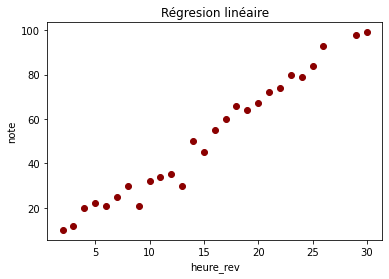

In [8]:
plt.scatter(reg["heure_rev"],reg["note"], color="darkred")
plt.xlabel("heure_rev")
plt.ylabel("note")
plt.title("Régresion linéaire")

In [9]:
X=pd.DataFrame({'heure_rev': reg["heure_rev"]})
X["unitaire"]=1
X=np.array(X)
X

array([[ 2,  1],
       [ 3,  1],
       [ 4,  1],
       [ 5,  1],
       [ 6,  1],
       [ 7,  1],
       [ 8,  1],
       [ 9,  1],
       [10,  1],
       [11,  1],
       [12,  1],
       [13,  1],
       [14,  1],
       [15,  1],
       [16,  1],
       [17,  1],
       [18,  1],
       [19,  1],
       [20,  1],
       [21,  1],
       [22,  1],
       [23,  1],
       [24,  1],
       [25,  1],
       [26,  1],
       [29,  1],
       [30,  1]], dtype=int64)

In [10]:
X2=np.array(reg["heure_rev"])
X2=X2.reshape(len(X2),1)
#X2.shape

o=np.ones(X2.shape)
o.shape

(27, 1)

In [11]:
X2_new=np.hstack((X2,o))
X2_new

array([[ 2.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 9.,  1.],
       [10.,  1.],
       [11.,  1.],
       [12.,  1.],
       [13.,  1.],
       [14.,  1.],
       [15.,  1.],
       [16.,  1.],
       [17.,  1.],
       [18.,  1.],
       [19.,  1.],
       [20.,  1.],
       [21.,  1.],
       [22.,  1.],
       [23.,  1.],
       [24.,  1.],
       [25.,  1.],
       [26.,  1.],
       [29.,  1.],
       [30.,  1.]])

In [12]:
Y2=np.array(reg["note"])
Y2=Y2.reshape(len(Y2),1)
Y2.shape

(27, 1)

In [13]:
teta=np.random.randn(2,1)
teta

array([[1.52460076],
       [0.56682477]])

In [14]:
Y=pd.DataFrame({'note': reg["note"]})
Y=np.array(Y)
Y

array([[10],
       [12],
       [20],
       [22],
       [21],
       [25],
       [30],
       [21],
       [32],
       [34],
       [35],
       [30],
       [50],
       [45],
       [55],
       [60],
       [66],
       [64],
       [67],
       [72],
       [74],
       [80],
       [79],
       [84],
       [93],
       [98],
       [99]], dtype=int64)

In [15]:
def model(X,teta):
    return X.dot(teta)

def fonction_count(X,Y,teta):
    m=len(Y)
    return np.sum((model(X,teta)-Y)**2)/(2*m)

fonction_count(X,Y,teta)

491.196286961397

In [16]:
def gradient(X,Y,teta):
    m=len(Y)
    return X.T.dot(model(X,teta)-Y)/m
gradient(X,Y,teta)

array([[-532.08570588],
       [ -27.37533414]])

In [17]:
n_iterations=25
alpha=0.001


def descente_gradient(X,Y,teta, alpha, n_iterations):
    cout = np.zeros(n_iterations)
     
    for i in range(0, n_iterations):
        teta = teta - alpha * gradient(X,Y,teta) # mise a jour du parametre teta (formule du gradient descent)
        cout[i] = fonction_count(X,Y,teta) # on enregistre la valeur du Cout au tour i 
         
    return teta, cout

t,c=descente_gradient(X,Y,teta, alpha, n_iterations)

In [18]:
t

array([[3.3287076],
       [0.6585651]])

In [19]:
c

array([249.18636542, 128.86449136,  69.04316901,  39.30135597,
        24.51439629,  17.16265231,  13.50752982,  11.69028413,
        10.78678931,  10.33759083,  10.11425822,  10.00322103,
         9.9480146 ,   9.92056595,   9.90691786,   9.90013108,
         9.8967556 ,   9.89507614,   9.8942399 ,   9.89382289,
         9.89361432,   9.89350937,   9.89345595,   9.89342815,
         9.89341308])

In [20]:
Y_pred=model(X,t)
Y_pred

array([[  7.3159803 ],
       [ 10.6446879 ],
       [ 13.9733955 ],
       [ 17.3021031 ],
       [ 20.6308107 ],
       [ 23.9595183 ],
       [ 27.2882259 ],
       [ 30.6169335 ],
       [ 33.9456411 ],
       [ 37.2743487 ],
       [ 40.60305631],
       [ 43.93176391],
       [ 47.26047151],
       [ 50.58917911],
       [ 53.91788671],
       [ 57.24659431],
       [ 60.57530191],
       [ 63.90400951],
       [ 67.23271711],
       [ 70.56142471],
       [ 73.89013231],
       [ 77.21883991],
       [ 80.54754751],
       [ 83.87625511],
       [ 87.20496271],
       [ 97.19108552],
       [100.51979312]])

In [21]:
Y_pred.mean()

51.08232097425607

In [22]:
U=np.ones(Y_pred.shape)
Y_moy=U*model(X,teta).mean()
Y_moy

array([[23.6617029],
       [23.6617029],
       [23.6617029],
       [23.6617029],
       [23.6617029],
       [23.6617029],
       [23.6617029],
       [23.6617029],
       [23.6617029],
       [23.6617029],
       [23.6617029],
       [23.6617029],
       [23.6617029],
       [23.6617029],
       [23.6617029],
       [23.6617029],
       [23.6617029],
       [23.6617029],
       [23.6617029],
       [23.6617029],
       [23.6617029],
       [23.6617029],
       [23.6617029],
       [23.6617029],
       [23.6617029],
       [23.6617029],
       [23.6617029]])

In [23]:
def R2(Y, Y_pred, Y_moy):
    u=np.sum((Y-Y_pred)**2)
    v=np.sum((Y-Y_moy)**2)
    return 1-(u/v)

R2(Y,Y_pred,Y_moy)

0.9867258614047192

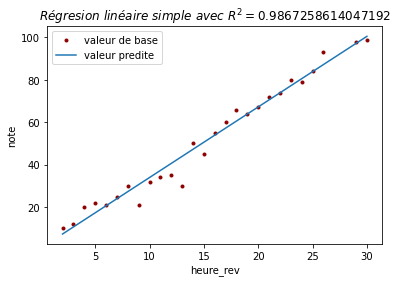

In [24]:
plt.plot(reg["heure_rev"],reg["note"],".", color="darkred", label="valeur de base")
plt.plot(reg["heure_rev"],Y_pred, label="valeur predite")
plt.xlabel("heure_rev")
plt.ylabel("note")
plt.title(r"$Régresion\ linéaire\ simple\ avec\ {R^2}=$"+ str(R2(Y,Y_pred,Y_moy)))
plt.legend()

Text(0.5, 1.0, 'fonction du coût selon les itérations')

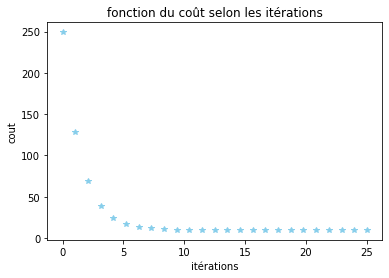

In [25]:
n=np.linspace(0,n_iterations, n_iterations)

plt.plot(n,c,"*", color="skyblue", label="valeur de base")
plt.xlabel("itérations")
plt.ylabel("cout")
plt.title("fonction du coût selon les itérations")

#  Régression linéaire multiple

In [3]:
def fonctionDeCout(X, y, theta):  
    m = y.size
    C = (X@theta-y).T@(X@theta-y)
    return C

In [4]:
def descenteDeGradient(X, y, theta, alpha, nombre_iterations):  
    m = y.size  #nombre de données
    n = theta.size # nombre de paramètres
    for j in range(nombre_iterations):
        for i in range(m):
            h = X[i].T@theta
            theta = theta - alpha/m*(h- y[i][0])*np.array([X[i]]).T
         
    return theta, fonctionDeCout(X, y, theta)

In [5]:
##Chargement des données
data = pd.read_csv("boston_house_prices.csv")  
#print(data.head())
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


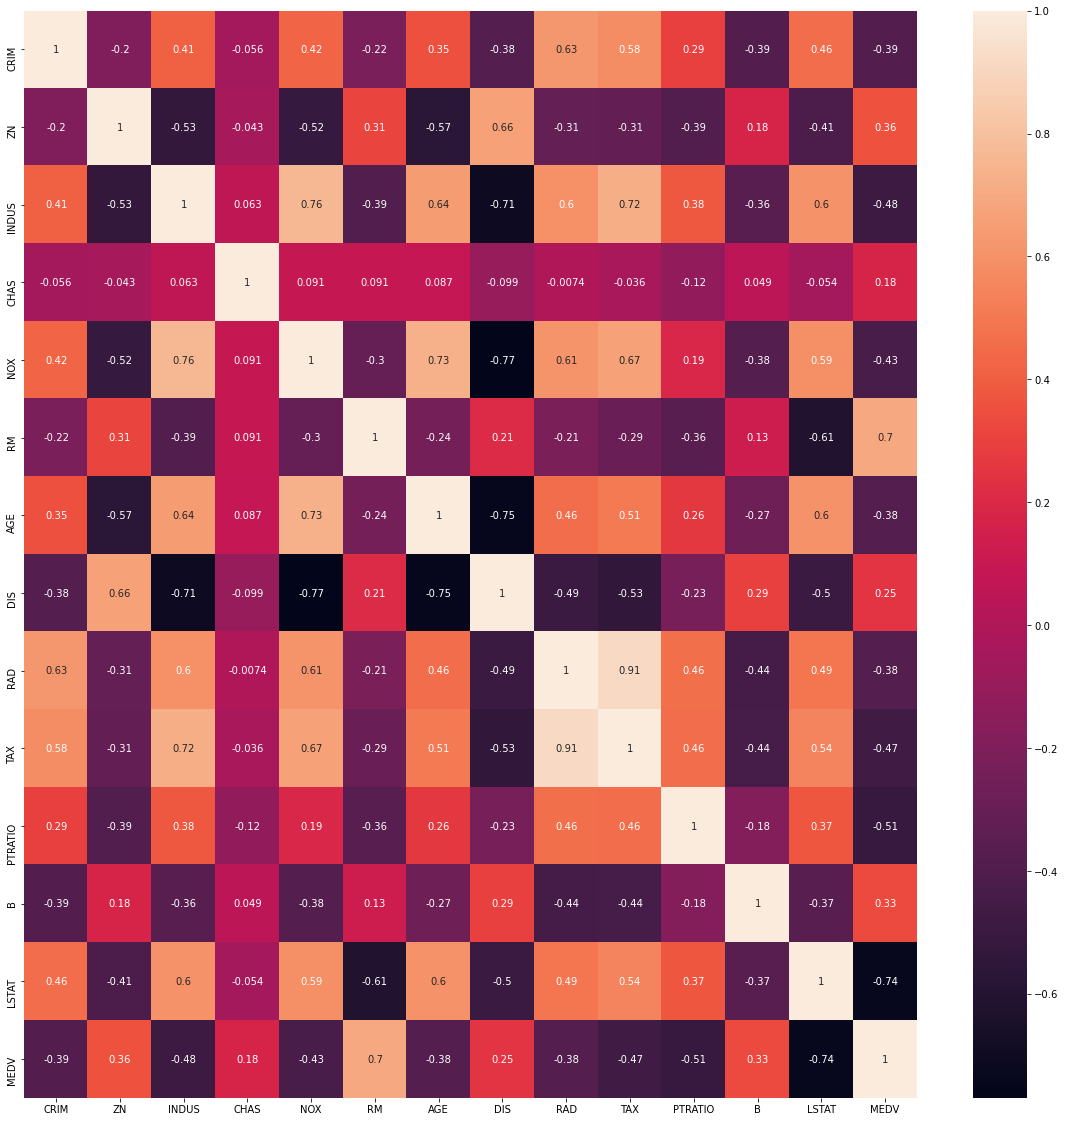

In [6]:
import seaborn as sns
plt.figure( figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

In [7]:
##On récupère les données dans des array X et y
nombreColonnes = data.shape[1]  
X = data.iloc[:,0:nombreColonnes -1]  
y = data.iloc[:,nombreColonnes -1:nombreColonnes]

In [8]:
X = np.array(X.values)  
y = np.array(y.values)
m = X.shape[0]

#print(X)
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [9]:
##On normalise les données afin d'éviter de créer des biais
##np.mean pour la moyenne et np.std pour l'ecart type
moyennes, ecs = [],[]

X_norm = np.zeros(X.shape)
for i in range(X.shape[1]):
    moyenne_donnee = np.mean(X[:,i])
    ec_donnee = np.std(X[:,i])
    X_norm[:,i] = (X[:,i] - (np.ones(X[:,i].shape))*moyenne_donnee)/ec_donnee
    moyennes.append(moyenne_donnee)
    ecs.append(ec_donnee)

X = X_norm

In [10]:
##On ajouite une colonne de 1
X = np.concatenate((np.ones((m, 1)), X), axis=1)

In [11]:
##On effectue la descente de gradient

alpha = 2
nombre_iterations = 50

n = X.shape[1]
theta = np.zeros((n,1))
theta, cout = descenteDeGradient(X, y, theta, alpha, nombre_iterations)




print("teta: ",theta)
print("cout: ",cout)

teta:  [[21.99678866]
 [-1.23399015]
 [ 0.81177416]
 [ 0.13724601]
 [ 0.93078914]
 [-2.06958538]
 [ 1.75488027]
 [ 0.10221821]
 [-2.71588863]
 [ 2.20069014]
 [-1.58229158]
 [-1.74311119]
 [ 0.68841687]
 [-4.2985838 ]]
cout:  [[11746.6588163]]


In [12]:
#Pour comparer, on peut utiliser la formule des moindes-carres
theta_mc = np.linalg.inv(X.T@X)@X.T@y


error = []
error_mc = []
for i in range(X.shape[0]):
    error.append(np.abs((X[i]@theta-y[i])[0]/y[i,0]))
    error_mc.append(np.abs((X[i]@theta_mc-y[i])[0]/y[i,0]))
    
print(np.mean(error),np.std(error))
print(np.mean(error_mc),np.std(error_mc))

0.1563639609142039 0.1721868499782961
0.16417298806489958 0.18533084355079613


In [13]:
def model(X,theta):
    return X.dot(theta)

In [14]:
Y_pred=model(X,theta)
Y_pred

array([[29.30892171],
       [24.77904992],
       [29.67273499],
       [28.21972955],
       [27.19455391],
       [25.47528708],
       [22.61899398],
       [18.57533786],
       [10.48448402],
       [18.44455621],
       [17.74189178],
       [21.31012704],
       [20.33701241],
       [20.4196876 ],
       [19.85311185],
       [20.24675417],
       [21.41176265],
       [17.21385478],
       [17.36559298],
       [19.19039964],
       [12.84713507],
       [18.03572259],
       [15.56492227],
       [13.93810143],
       [15.99091297],
       [14.25114458],
       [16.11233159],
       [14.92584164],
       [19.4058513 ],
       [20.50898479],
       [11.5699328 ],
       [18.4170052 ],
       [ 8.35333939],
       [14.6660151 ],
       [13.59679279],
       [23.98826588],
       [22.51764983],
       [23.48879692],
       [22.99063912],
       [30.36044949],
       [32.82021781],
       [27.52119694],
       [25.43019349],
       [24.63382306],
       [23.09619797],
       [22

In [15]:
U=np.ones(Y_pred.shape)
Y_moy=U*model(X,theta).mean()

def R2(Y, Y_pred, Y_moy):
    u=np.sum((Y-Y_pred)**2)
    v=np.sum((Y-Y_moy)**2)
    return 1-(u/v)

R2(y,Y_pred,Y_moy)

0.725940287449109

Text(0.5, 0, 'MEDV')

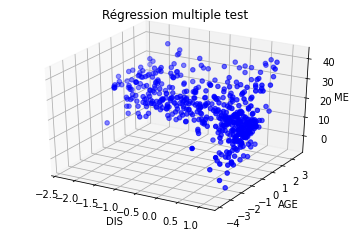

In [16]:
#plt.plot(X[:,1],X[:,2],y,".", color="darkred", label="valeur de base")
#plt.plot(X[:,1],X[:,2],Y_pred, label="valeur predite")


fig = plt.figure()
ax = fig.add_subplot(projection='3d')


ax.scatter(X[:,7], X[:,6], Y_pred, c='b')
ax.set_title("Régression multiple test")
ax.set_xlabel("DIS")
ax.set_ylabel("AGE")
ax.set_zlabel("MEDV")

Text(0.5, 0, 'MEDV')

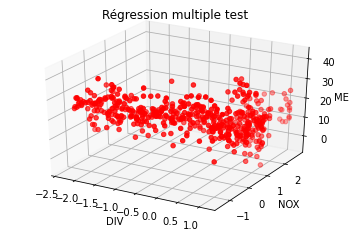

In [52]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(projection='3d')

ax2.scatter(X[:,7], X[:,5], Y_pred, c='r')
ax2.set_title("Régression multiple test")
ax2.set_xlabel("DIV")
ax2.set_ylabel("NOX")
ax2.set_zlabel("MEDV")

# Régression Polynomiale pour Position Salaries

In [53]:
ps=pd.read_csv("Position_Salaries.csv")
ps.head()

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


Text(0.5, 1.0, 'Régresion linéaire polynomiale')

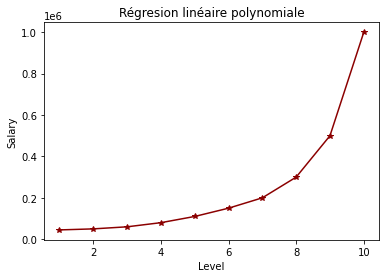

In [54]:
plt.plot(ps["Level"],ps["Salary"], "*-", color="darkred")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Régresion linéaire polynomiale")

In [55]:
ps = pd.concat([pd.Series(1, index=ps.index, name='00'), ps], axis=1)
ps.head()

,00,Position,Level,Salary
0,1,Project Analyste,1,45000
1,1,Ingenieur,2,50000
2,1,Senior Consultant,3,60000
3,1,Manager,4,80000
4,1,Country Manager,5,110000


In [56]:
ps=ps.drop(columns='Position')

In [57]:
y = ps['Salary']
y.head()

0     45000
1     50000
2     60000
3     80000
4    110000
Name: Salary, dtype: int64

In [58]:
X=ps.iloc[:,:-1]
X.head()

,00,Level
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


In [59]:
X['Level2']=X['Level']**2
X['Level3']=X['Level']**3

In [60]:
X.head()

,00,Level,Level2,Level3
0,1,1,1,1
1,1,2,4,8
2,1,3,9,27
3,1,4,16,64
4,1,5,25,125


In [77]:
X = X/X.max()
y=y/y.max()

In [78]:
theta = np.array([0]*len(X.columns))
theta

array([0, 0, 0, 0])

In [79]:
def hypothesis(X, theta):
    y1 = theta*X
    return np.sum(y1, axis=1)

In [80]:
def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return sum(np.sqrt((y1-y)**2))/(2*m) 

In [81]:
def gradientDescent(X, y, theta, alpha, epoch):
    J=[]
    k=0
    while k < epoch:
        y1 = hypothesis(X, theta)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*sum((y1-y)* X.iloc[:, c])/m
        j = cost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [82]:
theta = np.array([0.0]*len(X.columns))
J, j, theta = gradientDescent(X, y, theta, 0.5, 5000)

In [83]:
theta

array([-0.02131781,  0.00782076,  0.28331666,  0.51663078])

In [84]:
y_hat = theta*X
y_hat = np.sum(y_hat, axis=1)

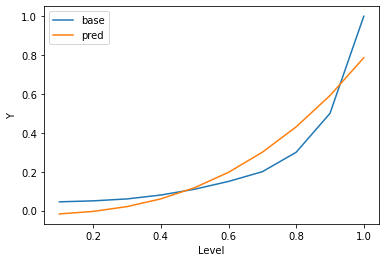

In [85]:
plt.figure()
plt.plot(X['Level'],y, label="base")          
plt.plot(X['Level'], y_hat, label="pred")
plt.xlabel("Level")
plt.ylabel("Y")
plt.legend()

In [86]:
mean_squared_error(y,y_hat)

0.009221374058322643

#  Régression Polynomial pour qualite vin rouge

In [70]:
qvr=pd.read_csv("qualite-vin-rouge.csv")
qvr.head()

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorures,dioxyde de soufre libre,anhydride sulfureux total,densité,pH,sulphates,alcool,qualité
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [71]:
#plt.figure( figsize=(20,20))
#sns.heatmap(qvr.corr(),annot=True)
qvr.corrwith(qvr['qualité'], method='pearson').abs().sort_values(ascending=False)

qualité                      1.000000
alcool                       0.476166
acidité volatile             0.390558
sulphates                    0.251397
acide citrique               0.226373
anhydride sulfureux total    0.185100
densité                      0.174919
chlorures                    0.128907
acidité fixe                 0.124052
pH                           0.057731
dioxyde de soufre libre      0.050656
sucre résiduel               0.013732
dtype: float64

Text(0.5, 1.0, 'Régresion linéaire polynomiale')

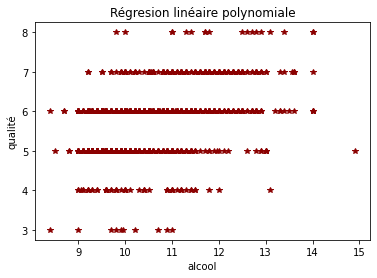

In [76]:
plt.plot(qvr["alcool"],qvr["qualité"], "*", color="darkred")
plt.xlabel("alcool")
plt.ylabel("qualité")
plt.title("Régresion linéaire polynomiale")

In [87]:
y = qvr['qualité']
y.head()

0    5
1    5
2    5
3    6
4    5
Name: qualité, dtype: int64

In [92]:
X=qvr['alcool']
X.head()

0    9.4
1    9.8
2    9.8
3    9.8
4    9.4
Name: alcool, dtype: float64

In [93]:
X = pd.concat([pd.Series(1, index=X.index, name='00'), X], axis=1)
X.head()

,00,alcool
0,1,9.4
1,1,9.8
2,1,9.8
3,1,9.8
4,1,9.4


In [94]:
X['alcool2']=X['alcool']**2
X['alcool3']=X['alcool']**3
X.head()

,00,alcool,alcool2,alcool3
0,1,9.4,88.36,830.584
1,1,9.8,96.04,941.192
2,1,9.8,96.04,941.192
3,1,9.8,96.04,941.192
4,1,9.4,88.36,830.584


In [95]:
X = X/X.max()
y=y/y.max()

In [96]:
theta = np.array([0]*len(X.columns))
theta

array([0, 0, 0, 0])

In [99]:
def hypothesis2(X, theta):
    y1 = theta*X
    return np.sum(y1, axis=1)

def cost2(X, y, theta):
    y1 = hypothesis2(X, theta)
    return sum(np.sqrt((y1-y)**2))/(2*m) 

def gradientDescent2(X, y, theta, alpha, epoch):
    J=[]
    k=0
    while k < epoch:
        y1 = hypothesis2(X, theta)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*sum((y1-y)* X.iloc[:, c])/m
        j = cost2(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

theta = np.array([0.0]*len(X.columns))
J, j, theta = gradientDescent2(X, y, theta, 0.05, 700)

In [100]:
theta

array([0.40035204, 0.26297553, 0.16877752, 0.10381996])

In [101]:
y_hat = theta*X
y_hat = np.sum(y_hat, axis=1)

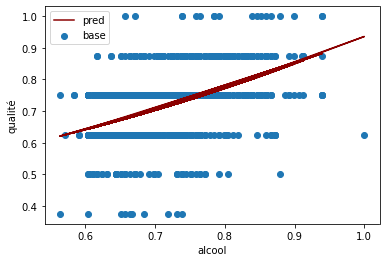

In [106]:
plt.figure()
plt.scatter(X['alcool'],y, label="base")          
plt.plot(X['alcool'], y_hat, label="pred", c='darkred')
plt.xlabel("alcool")
plt.ylabel("qualité")
plt.legend()

In [102]:
mean_squared_error(y,y_hat)

0.007899604103164752

In [109]:
mean_absolute_error(y,y_hat)

0.07064310579277666